# Divvy Bikes Data Analysis using R

### Scenario
In 2016, Cyclistic launched a successful bike-sharing program. Since then, the program has grown to a fleet of 5,824 georeferenced bicycles, stationed at 692 locations throughout Chicago. Bicycles can be unlocked from one station and returned to any other station in the system at any time. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who buy annual memberships are called members riders. Cyclistic's financial analysts have concluded that annual members are much more profitable than casual riders, so it will be necessary to maximize the number of annual members for future growth.

### Objective
Understanding the behavior or differences of casual riders compared to annual members and, in this way, providing concise and clear strategies to encourage them to want to obtain a subscription.


## Ask
* How do annual members and casual riders differ in their use of Cyclistic bikes?
* Why might casual riders buy annual memberships with Cyclistic?
* How can Cyclistic leverage digital media to influence casual riders to become members?
* Is there any prominent usage pattern, such as weekends versus weekdays?
* Are there any seasonal patterns that indicate key times for promotions?

## Prepare the data

#### Load packages

In [2]:
library(tidyverse)
library(lubridate)
library("RColorBrewer")
library(patchwork)
library(scales)
library("ggrepel")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




#### Read csv

In [3]:
divvy_202201  = read_csv("/kaggle/input/divvy-bikes/202201-divvy-tripdata.csv")
divvy_202202  = read_csv("/kaggle/input/divvy-bikes/202202-divvy-tripdata.csv")
divvy_202203  = read_csv("/kaggle/input/divvy-bikes/202203-divvy-tripdata.csv")
divvy_202204  = read_csv("/kaggle/input/divvy-bikes/202204-divvy-tripdata.csv")
divvy_202205  = read_csv("/kaggle/input/divvy-bikes/202205-divvy-tripdata.csv")
divvy_202206  = read_csv("/kaggle/input/divvy-bikes/202206-divvy-tripdata.csv")
divvy_202207  = read_csv("/kaggle/input/divvy-bikes/202207-divvy-tripdata.csv")
divvy_202208  = read_csv("/kaggle/input/divvy-bikes/202208-divvy-tripdata.csv")
divvy_202209  = read_csv("/kaggle/input/divvy-bikes/202209-divvy-tripdata.csv")
divvy_202210  = read_csv("/kaggle/input/divvy-bikes/202210-divvy-tripdata.csv")
divvy_202211  = read_csv("/kaggle/input/divvy-bikes/202211-divvy-tripdata.csv")
divvy_202212  = read_csv("/kaggle/input/divvy-bikes/202212-divvy-tripdata.csv")

Rows: 103770 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 115609 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 284042 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

#### Total number of records in the dataset

In [4]:
list_df=list(divvy_202201,divvy_202202,divvy_202203,divvy_202204,divvy_202205,divvy_202206,divvy_202207,divvy_202208,divvy_202209,divvy_202210,divvy_202211,divvy_202212)
amount_rows <- lapply(list_df, nrow)
total_amount_rows <- sum(unlist(amount_rows))
print(total_amount_rows)

[1] 5667717


#### Dataframe joining

In [5]:
divvy_2022 = bind_rows(divvy_202201,divvy_202202,divvy_202203,divvy_202204,divvy_202205,divvy_202206,divvy_202207,divvy_202208,divvy_202209,divvy_202210,divvy_202211,divvy_202212)
print(nrow(divvy_2022))

[1] 5667717


#### Sumary

In [6]:
str(divvy_2022)

spc_tbl_ [5,667,717 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5667717] "C2F7DD78E82EC875" "A6CF8980A652D272" "BD0F91DFF741C66D" "CBB80ED419105406" ...
 $ rideable_type     : chr [1:5667717] "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:5667717], format: "2022-01-13 11:59:47" "2022-01-10 08:41:56" ...
 $ ended_at          : POSIXct[1:5667717], format: "2022-01-13 12:02:44" "2022-01-10 08:46:17" ...
 $ start_station_name: chr [1:5667717] "Glenwood Ave & Touhy Ave" "Glenwood Ave & Touhy Ave" "Sheffield Ave & Fullerton Ave" "Clark St & Bryn Mawr Ave" ...
 $ start_station_id  : chr [1:5667717] "525" "525" "TA1306000016" "KA1504000151" ...
 $ end_station_name  : chr [1:5667717] "Clark St & Touhy Ave" "Clark St & Touhy Ave" "Greenview Ave & Fullerton Ave" "Paulina St & Montrose Ave" ...
 $ end_station_id    : chr [1:5667717] "RP-007" "RP-007" "TA1307000001" "TA1309000021" ...
 $ start_lat         : num [1:5

## Process the data

#### Save a copy for security and don't lose the data

In [7]:
copy1=divvy_2022

#### Verify which columns have N/A values

In [8]:
colSums(is.na(divvy_2022))

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
            833064             833064             892742             892742 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               5858               5858 
     member_casual 
                 0

#### Remove N/A values

In [9]:
divvy_2022=divvy_2022%>%drop_na(start_station_name,end_station_name,end_lat)
print(nrow(divvy_2022))

[1] 4369360


#### Verify that the "PK" column does not have any duplicate values.


In [10]:
length(unique(divvy_2022$ride_id))

[1] 4369360

#### Verify that there are no additional values.


In [11]:
unique(divvy_2022$member_casual)
unique(divvy_2022$rideable_type)

[1] "casual" "member"

[1] "electric_bike" "classic_bike"  "docked_bike"

#### Create and modify columns.

In [12]:
#Calculate trip duration
divvy_2022=divvy_2022%>%mutate(duration=hms::hms(seconds_to_period(difftime(ended_at,started_at))))
#Create a new column called "hour" that pulls the start time of the trip
divvy_2022=divvy_2022%>%mutate(hour=hour(started_at))
#Change the data type to DATE for column "started_at"
divvy_2022=divvy_2022%>%mutate(started_at=as_date(started_at))
#Create a new column called "month" that specifies when the trip was started
divvy_2022=divvy_2022%>%mutate(month=month(started_at))
#Change the data type to DATE for column "ended_at"
divvy_2022=divvy_2022%>%mutate(ended_at=as_date(ended_at))
#Create a new column with the day the trip started
divvy_2022=divvy_2022%>%mutate(day_of_week=weekdays(started_at))
#Create a new column that specifies whether the trip started at Rush Hour or not
divvy_2022=divvy_2022%>%mutate(type_hour=ifelse(hour %in% c(6,7,8,16,17,18),"rush-hour","not-rush-hour"))
#Create a new column that specifies what season of the year the trip started
divvy_2022=divvy_2022%>%mutate(season=case_when(
                                              started_at >= date("2022-03-20") & started_at < date("2022-6-21")~"Spring",
                                              started_at >= date("2022-6-21") & started_at < date("2022-09-22")~"Summer",
                                              started_at >= date("2022-09-22") & started_at < date("2022-12-21")~"Autumn",
                                              TRUE~"Winter"))
#Create a new column that specifies whether the trip starts on a weekday or weekend
divvy_2022=divvy_2022%>%mutate(type_day=ifelse(day_of_week %in% c("Sunday","Saturday"),"Weekend","Weekday"))

#### Final Table

In [13]:
#Change of values in the rideable_type column, as per Divvy Bikes, docked_bike is equivalent to classic_bike.
divvy_2022=divvy_2022%>%mutate(rideable_type=ifelse(rideable_type=="docked_bike"|rideable_type=="classic_bike","classic_bike","electric_bike"))
#Filter to get those trips with a duration greater than 1 minute and less than 24 hours.
divvy_2022=divvy_2022%>%filter(duration<hms("23:59:59")&duration>hms("00:01:00"))%>%select(rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,duration,hour,type_hour,month,day_of_week,season,type_day)
max(divvy_2022$duration)
min(divvy_2022$duration)

Time difference of 86362 secs

Time difference of 61 secs

#### Summary

In [14]:
str(divvy_2022)
head(divvy_2022)
unique(divvy_2022$day_of_week)

tibble [4,291,805 × 13] (S3: tbl_df/tbl/data.frame)
 $ rideable_type     : chr [1:4291805] "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : Date[1:4291805], format: "2022-01-13" "2022-01-10" ...
 $ ended_at          : Date[1:4291805], format: "2022-01-13" "2022-01-10" ...
 $ start_station_name: chr [1:4291805] "Glenwood Ave & Touhy Ave" "Glenwood Ave & Touhy Ave" "Sheffield Ave & Fullerton Ave" "Clark St & Bryn Mawr Ave" ...
 $ end_station_name  : chr [1:4291805] "Clark St & Touhy Ave" "Clark St & Touhy Ave" "Greenview Ave & Fullerton Ave" "Paulina St & Montrose Ave" ...
 $ member_casual     : chr [1:4291805] "casual" "casual" "member" "casual" ...
 $ duration          : 'hms' num [1:4291805] 00:02:57 00:04:21 00:04:21 00:14:56 ...
  ..- attr(*, "units")= chr "secs"
 $ hour              : int [1:4291805] 11 8 4 0 1 18 18 12 7 15 ...
 $ type_hour         : chr [1:4291805] "not-rush-hour" "rush-hour" "not-rush-hour" "not-rush-hour" ...
 $ month    

rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,duration,hour,type_hour,month,day_of_week,season,type_day
<chr>,<date>,<date>,<chr>,<chr>,<chr>,<time>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>
electric_bike,2022-01-13,2022-01-13,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,00:02:57,11,not-rush-hour,1,Thursday,Winter,Weekday
electric_bike,2022-01-10,2022-01-10,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,00:04:21,8,rush-hour,1,Monday,Winter,Weekday
classic_bike,2022-01-25,2022-01-25,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,member,00:04:21,4,not-rush-hour,1,Tuesday,Winter,Weekday
classic_bike,2022-01-04,2022-01-04,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,casual,00:14:56,0,not-rush-hour,1,Tuesday,Winter,Weekday
classic_bike,2022-01-20,2022-01-20,Michigan Ave & Jackson Blvd,State St & Randolph St,member,00:06:02,1,not-rush-hour,1,Thursday,Winter,Weekday
classic_bike,2022-01-11,2022-01-11,Wood St & Chicago Ave,Honore St & Division St,member,00:03:22,18,rush-hour,1,Tuesday,Winter,Weekday


[1] "Thursday"  "Monday"    "Tuesday"   "Sunday"    "Saturday"  "Friday"   
[7] "Wednesday"

## Analyze the data

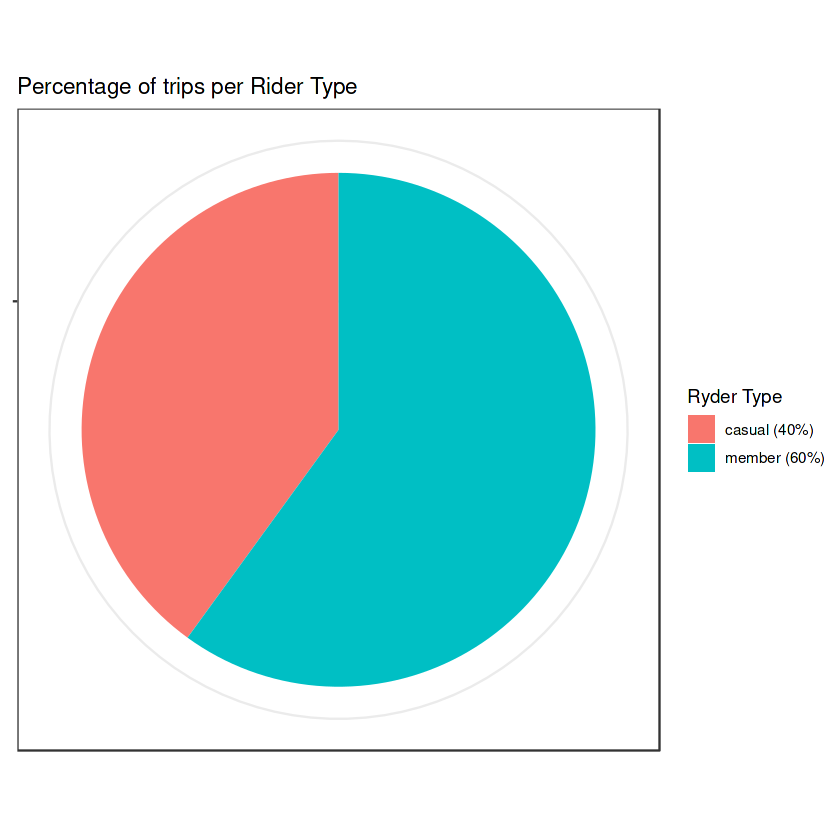

In [15]:
divvy_2022%>%
group_by(member_casual)%>%
summarise(amount_of_trips=n())%>%
mutate(percentage=round((amount_of_trips/sum(amount_of_trips)*100)),digits=2)%>%
ggplot(aes(x="",percentage))+
geom_bar(stat = "identity",aes(fill=paste0(member_casual," ","(",percentage,"%)")),width = 1)+
coord_polar('y')+
labs(,title="Percentage of trips per Rider Type",x = NULL, y = NULL, fill = "Ryder Type")+
theme_bw()+
scale_y_continuous(breaks = NULL)


`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


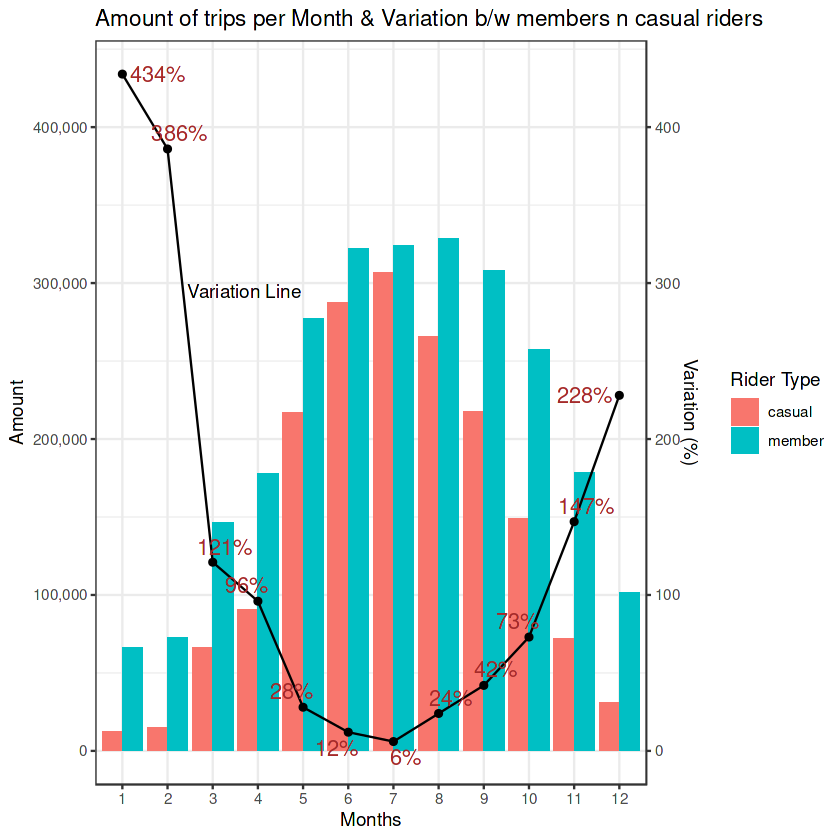

In [16]:
b=divvy_2022 %>%
  group_by(month, member_casual) %>%
  summarise(count = n()) %>%
  spread(key = member_casual, value = count) %>%
  mutate(variacion = round(((member - casual) / casual)*100,digits = 0))


divvy_2022%>%
group_by(month=factor(month, levels=1:12),member_casual)%>%
summarise(count=n())%>%
ggplot(aes(month,count))+
geom_bar(aes(fill=member_casual),stat = "identity", position = "dodge")+
labs(title="Amount of trips per Month & Variation b/w members n casual riders",x="Months",y="Amount",fill="Rider Type")+
theme_bw()+
scale_y_continuous(sec.axis = sec_axis(~./1000, name = "Variation (%)"),labels = comma_format())+
geom_line(data=b,aes(month,variacion*1000),col="black")+
geom_point(data=b,aes(month,variacion*1000),col="black")+
geom_text_repel(data = b, aes(month, variacion * 1000, label = paste0(variacion,"%")), nudge_y = 0.1,col="brown",size=4.5)+
annotate("text",x=3.7,y=295000,label="Variation Line")

`summarise()` has grouped output by 'month', 'member_casual'. You can override
using the `.groups` argument.


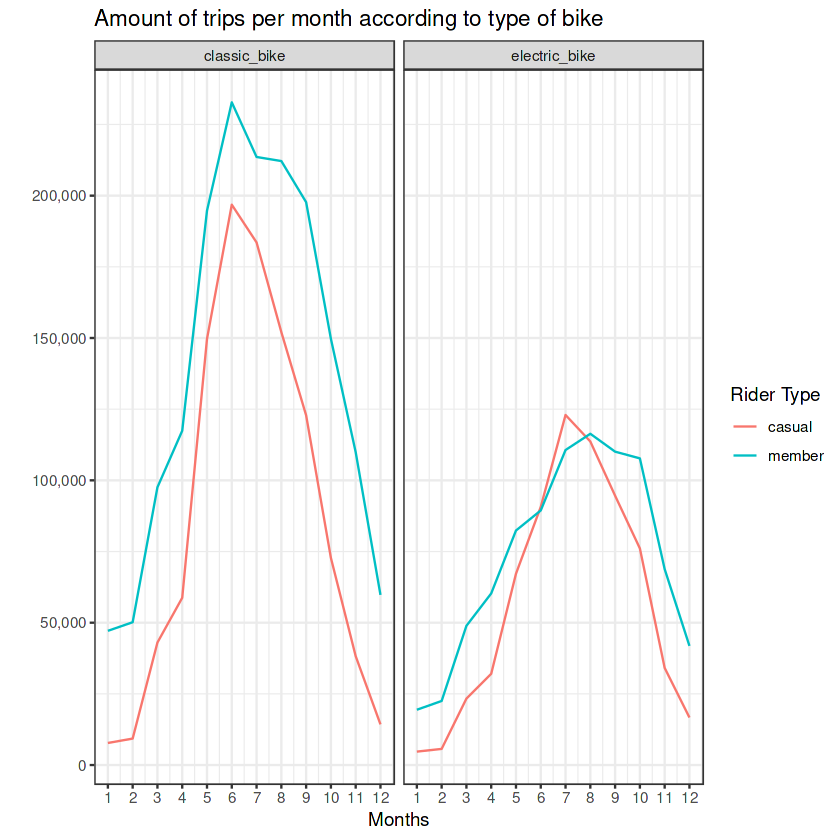

In [17]:
divvy_2022%>%
group_by(month,member_casual,rideable_type)%>%
summarise(count=n())%>%
ggplot(aes(month,count))+
geom_line(aes(col=member_casual))+
facet_grid(~rideable_type)+
labs(title = "Amount of trips per month according to type of bike",y="",x="Months",col="Rider Type")+
scale_x_continuous(breaks=c(1,2,3,4,5,6,7,8,9,10,11,12))+
theme_bw()+
scale_y_continuous(labels = comma_format())

In [18]:
divvy_2022%>%
group_by(member_casual,rideable_type)%>%
summarise(count=n())%>%
mutate(percentage=round(((count/sum(count))*100),digits=1))

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,rideable_type,count,percentage
<chr>,<chr>,<int>,<dbl>
casual,classic_bike,1049071,60.6
casual,electric_bike,681748,39.4
member,classic_bike,1682613,65.7
member,electric_bike,878373,34.3


`summarise()` has grouped output by 'month', 'member_casual'. You can override
using the `.groups` argument.


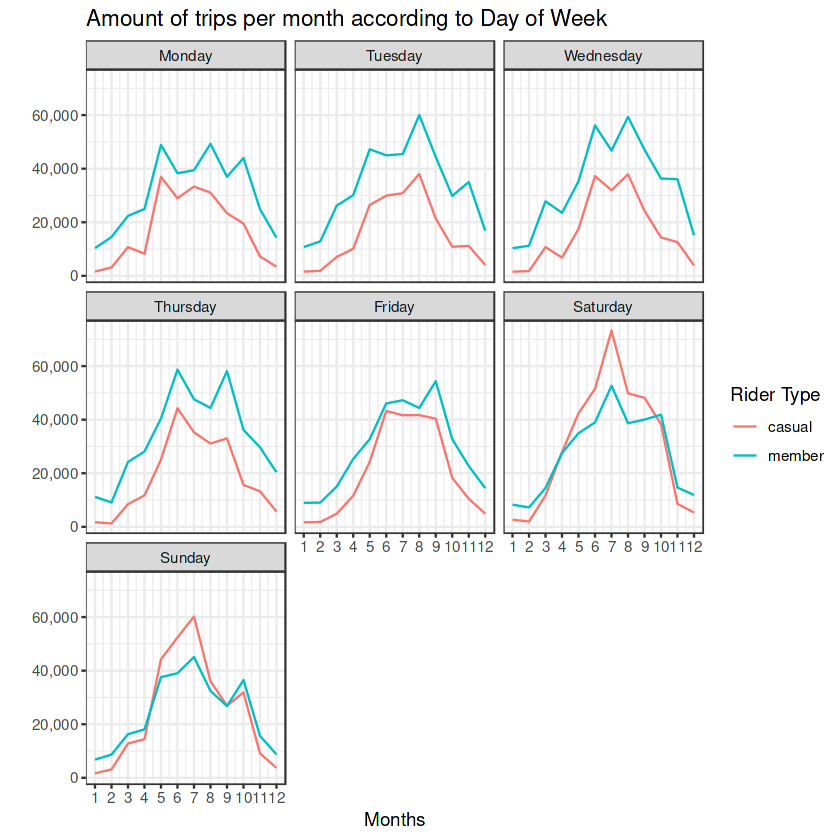

In [19]:
order_of_days <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
divvy_2022$day_of_week=factor(divvy_2022$day_of_week, levels = order_of_days)
divvy_2022%>%
group_by(month,member_casual,day_of_week)%>%
summarise(count=n())%>%
ggplot(aes(month,count))+
geom_line(aes(col=member_casual))+
facet_wrap(~day_of_week)+
labs(title = "Amount of trips per month according to Day of Week",y="",x="Months",col="Rider Type")+
scale_x_continuous(breaks=c(1,2,3,4,5,6,7,8,9,10,11,12))+
theme_bw()+
scale_y_continuous(labels = comma_format())

`summarise()` has grouped output by 'month', 'member_casual'. You can override
using the `.groups` argument.


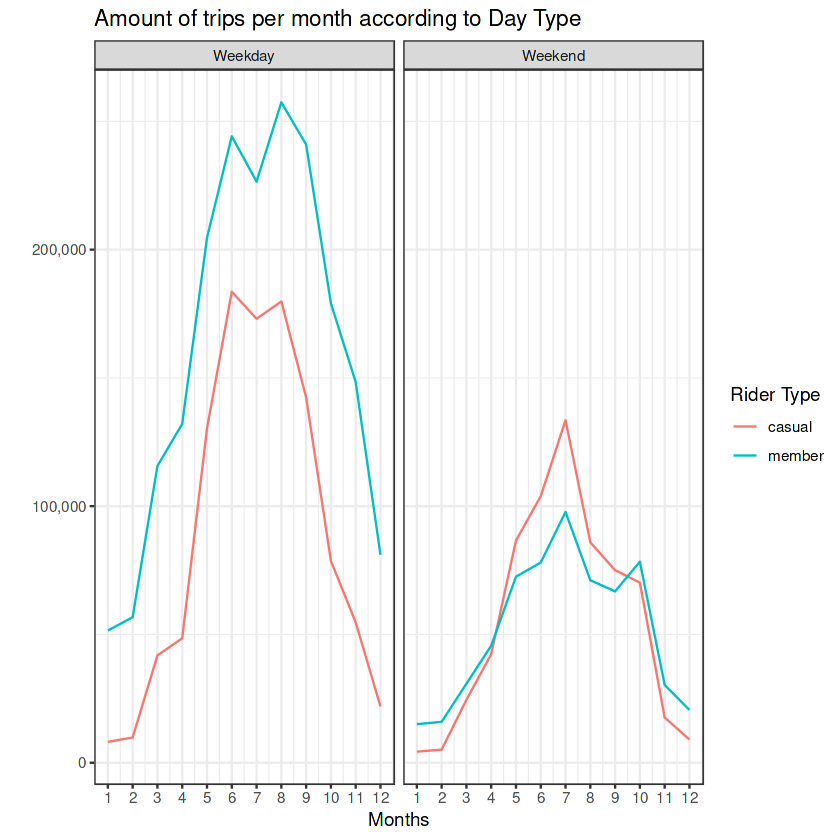

In [20]:
divvy_2022%>%
group_by(month,member_casual,type_day)%>%
summarise(count=n())%>%
ggplot(aes(month,count))+
geom_line(aes(col=member_casual))+
facet_grid(~type_day)+
labs(title = "Amount of trips per month according to Day Type",y="",x="Months",col="Rider Type")+
scale_x_continuous(breaks=c(1,2,3,4,5,6,7,8,9,10,11,12))+
theme_bw()+
scale_y_continuous(labels = comma_format())

In [21]:
divvy_2022%>%
group_by(type_day,member_casual)%>%
summarise(count=n())%>%
mutate(percentage=round(((count/sum(count))*100),digits=1))


`summarise()` has grouped output by 'type_day'. You can override using the
`.groups` argument.


type_day,member_casual,count,percentage
<chr>,<chr>,<int>,<dbl>
Weekday,casual,1072782,35.6
Weekday,member,1938146,64.4
Weekend,casual,658037,51.4
Weekend,member,622840,48.6


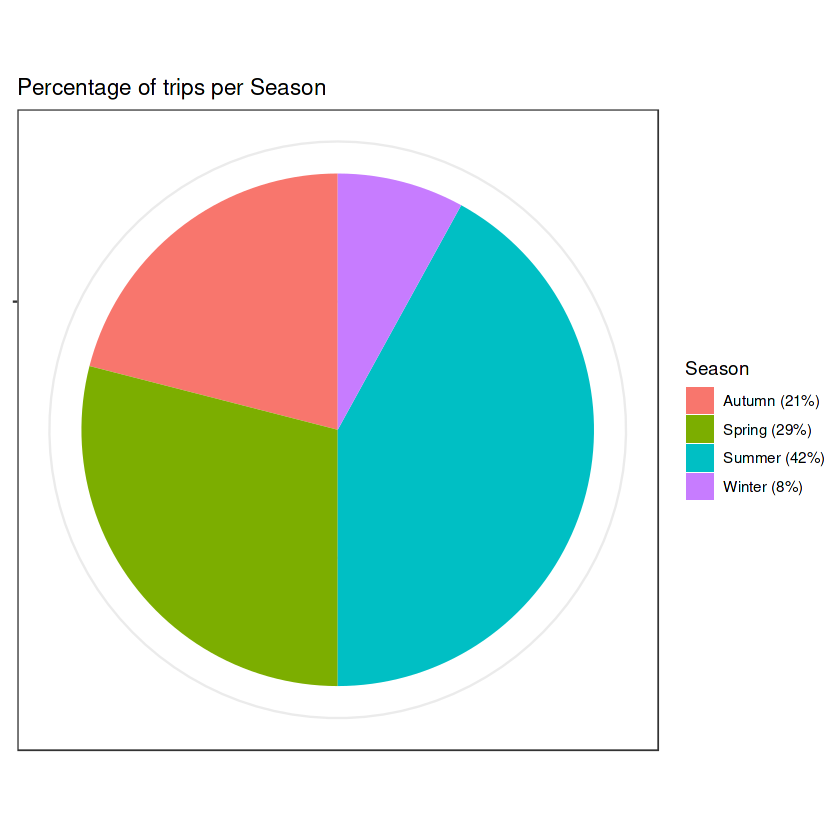

In [22]:
divvy_2022%>%
group_by(season)%>%
summarise(amount_of_trips=n())%>%
mutate(percentage=round((amount_of_trips/sum(amount_of_trips)*100)),digits=2)%>%
ggplot(aes(x="",percentage))+
geom_bar(stat = "identity",aes(fill=paste0(season," ","(",percentage,"%)")),width = 1)+coord_polar('y')+
labs(title="Percentage of trips per Season",x = NULL, y = NULL, fill = "Season")+
theme_bw()+
scale_y_continuous(breaks = NULL)

`summarise()` has grouped output by 'season'. You can override using the
`.groups` argument.


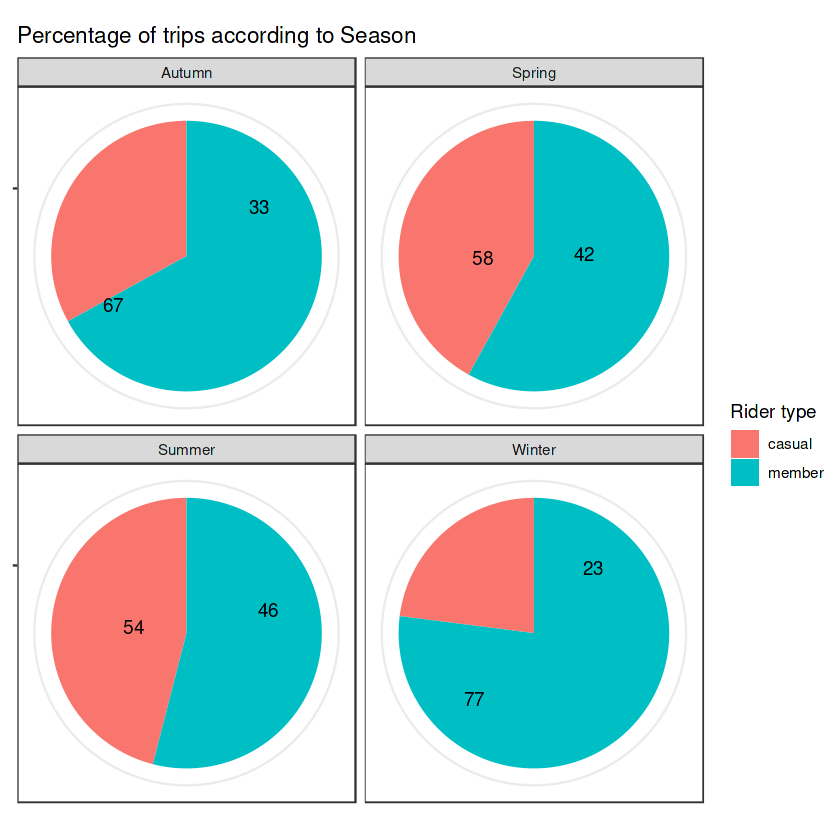

In [23]:
divvy_2022%>%
group_by(season,member_casual)%>%
summarise(amount_of_trips=n())%>%
mutate(percentage=round((amount_of_trips/sum(amount_of_trips)*100)),digits=2)%>%
ggplot(aes(x="",percentage))+
geom_bar(stat = "identity",aes(fill=member_casual),width = 1)+
facet_wrap(~season)+coord_polar('y')+
labs(title = "Percentage of trips according to Season",x = NULL, y = NULL, fill = "Rider type")+
theme_bw()+
scale_y_continuous(breaks = NULL)+
geom_text_repel(aes(label=percentage),position = position_stack(vjust = 0.1))

In [ ]:
c=divvy_2022 %>%
  group_by(day_of_week, member_casual) %>%
  summarise(count = n()) %>%
  spread(key = member_casual, value = count) %>% 
  mutate(variacion = round(((member - casual) / casual)*100,digits = 1))

p1=divvy_2022%>%
ggplot(aes(day_of_week))+
geom_bar(aes(fill=member_casual),position = "dodge")+
theme_bw()+
labs(y="Amount",fill="Rider Type",x="")+
scale_y_continuous(sec.axis = sec_axis(~./2500, name = "Variation (%)"),labels = comma_format())+
geom_line(data=c,aes(day_of_week,variacion*2500),group=1)+
geom_point(data=c,aes(day_of_week,variacion*2500),col="black")+
geom_text_repel(data = c, aes(day_of_week, variacion * 2500, label = paste0(variacion,"%")), nudge_y = 0.1,col="brown",size=4.5)+annotate("text",x=3,y=290000,label="Variation Line")

p2=divvy_2022%>%
group_by(day_of_week,member_casual)%>%
summarise(count=n())%>%
ggplot(aes(day_of_week,count))+
geom_line(aes(col=member_casual,group=member_casual))+
theme_bw()+
guides(col = FALSE)+
scale_y_continuous(labels = comma_format())+
labs(y="Amount",x="")

(p1/p2)+
plot_annotation(title = "Amount of trips per day & Variation b/w members n casual riders")+
plot_layout(guides = 'collect')

`summarise()` has grouped output by 'day_of_week'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'day_of_week'. You can override using the
`.groups` argument.
Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


In [ ]:
divvy_2022%>%
group_by(day_of_week,season)%>%
summarise(count=n())%>%
ggplot(aes(day_of_week,count))+
geom_line(aes(col=season,group=season))+
theme_bw()+
scale_y_continuous(labels = comma_format())+
labs(title="Amount of trips per Season",y="",col="Season",x="Day of week")

In [ ]:
divvy_2022%>%
group_by(day_of_week,season,member_casual)%>%
summarise(count=n())%>%
ggplot(aes(day_of_week,count))+
geom_line(aes(col=season,group=season))+
facet_grid(~member_casual)+
theme_bw()+
scale_y_continuous(labels = comma_format())+
labs(title="Amount of trips per Season according to rider type",y="",col="Season",x="Day of week")+
scale_x_discrete(labels =c("Mon","Tues","Wed","Thur","Frid","Sat","Sun"))

In [ ]:
divvy_2022%>%
group_by(day_of_week,type_hour,member_casual)%>%
summarise(count=n())%>%
ggplot(aes(day_of_week,count))+
geom_line(aes(col=member_casual,group=member_casual))+
facet_grid(~type_hour)+
theme_bw()+
scale_y_continuous(labels = comma_format())+labs(title="Amount of trips per Season according to type hour",y="",col="Rider Type",x="Day of week",caption = "rush-hour = 6, 7, 8, 16, 17, 18 hours")+
scale_x_discrete(labels =c("Mon","Tues","Wed","Thur","Frid","Sat","Sun"))

In [ ]:
p1=divvy_2022%>%
group_by(type_day)%>%
summarise(amount_of_trips=n())%>%
mutate(percentage=round((amount_of_trips/sum(amount_of_trips)*100)),digits=2)%>%
ggplot(aes(x="",percentage))+
geom_bar(stat = "identity",aes(fill=paste0(type_day," ","(",percentage,"%)")),width = 1)+
coord_polar('y')+
labs(title = "Percentage of trips per day type",x = NULL, y = NULL, fill = "Day type")+
theme_bw()+
scale_y_continuous(breaks = NULL)

p2=divvy_2022%>%
group_by(type_day,member_casual)%>%
summarise(amount_of_trips=n())%>%
mutate(percentage=round((amount_of_trips/sum(amount_of_trips)*100)),digits=2)%>%
ggplot(aes(x="",percentage))+
geom_bar(stat = "identity",aes(fill=member_casual),width = 1)+
facet_wrap(~type_day)+
coord_polar('y')+
labs(title = NULL,x = NULL, y = NULL, fill = "Rider Type")+
theme_bw()+
scale_y_continuous(breaks = NULL)+
geom_text_repel(aes(label=percentage),position = position_stack(vjust = 0.1))+
labs(title="Percentage of trips per Rider Type according to Day Type")

p1/p2

In [ ]:
divvy_2022%>%
group_by(hour,member_casual)%>%
summarise(count=n())%>%
ggplot(aes(hour,count))+
geom_line(aes(col=member_casual))+
theme_bw()+
scale_y_continuous(labels = comma_format())+
labs(title="Amount of trips per Hour",y="",col="Rider Type",x="Hour")

In [ ]:
divvy_2022%>%
group_by(hour,type_day,member_casual)%>%
summarise(count=n())%>%
ggplot(aes(hour,count))+
geom_line(aes(col=member_casual))+
facet_grid(~type_day)+
theme_bw()+
scale_y_continuous(labels = comma_format())+
labs(title="Amount of trips per hour according to Day Type",y="",col="Rider Type",x="Hour")

In [ ]:
a=divvy_2022%>%
group_by(hour,member_casual)%>%
summarise(count=n())%>%
spread(key=member_casual,value=count)%>%
mutate(variation=round(((member-casual)/casual)*100,digits=0))

divvy_2022%>%
ggplot(aes(hour))+
geom_bar(aes(fill=member_casual))+
theme_bw()+
labs(title="Amount of trips per Hour & Variation b/w members n casual riders",x="Hour",y="Amount",fill="Rider Type")+
theme_bw()+
scale_y_continuous(sec.axis = sec_axis(~./1000, name = "Variation (%)"),labels = comma_format())+
geom_line(data=a,aes(hour,variation*1000),col="black")+
geom_point(data=a,aes(hour,variation*1000),col="black")+
geom_text_repel(data = a%>% filter(hour %% 2 == 0), aes(hour, variation * 1000, label = paste0(variation,"%")), nudge_y = 0.1,col="brown",size=4.5)+
annotate("text",x=7,y=295000,label="Variation Line")


In [ ]:
divvy_2022%>%
group_by(member_casual)%>%
summarise(avg_duration=hms::as_hms(mean(duration)))%>%
ggplot(aes(member_casual,avg_duration,fill=member_casual))+
geom_bar(stat = "identity")+
labs(title="Average trip duration",y=NULL,x=NULL,fill="Rider Type")+
geom_hline(yintercept=(mean(divvy_2022$duration)),col="brown")+
annotate("text",x=1.5,y=1070,label="Global Mean (00:17:16)",col="brown")+
geom_text(aes(label=avg_duration))+theme_bw()

In [ ]:
divvy_2022%>%
group_by(member_casual)%>%
summarise(t_duration=hms::as_hms(sum(duration)))%>%
ggplot(aes(member_casual,t_duration,fill=member_casual))+
geom_bar(stat = "identity")+
labs(title="Total time traveled per Rider Type",y=NULL,x=NULL,fill="Rider Type")+
theme_bw()


In [ ]:
divvy_2022%>%
mutate(time_interval=case_when(
  duration >= hms("00:01:00") & duration <= hms("00:10:00")~"1-10 min",
  duration > hms("00:10:00") & duration <= hms("00:20:00")~"10-20 min",
  duration > hms("00:20:00") & duration <= hms("00:30:00")~"20-30 min",
  duration > hms("00:30:00") & duration <= hms("00:40:00")~"30-40 min",
  duration > hms("00:40:00") & duration <= hms("00:50:00")~"40-50 min",
  duration > hms("00:50:00") & duration <= hms("00:60:00")~"50-60 min",
  TRUE~">60 min"))%>%
group_by(time_interval)%>%
summarise(amount_of_trips=n())%>%
mutate(percentage=round((amount_of_trips/sum(amount_of_trips)*100)),digits=2)%>%
ggplot(aes(x="",percentage))+
geom_bar(stat = "identity",aes(fill=paste0(time_interval," ","(",percentage,"%)")),width = 1)+
coord_polar('y')+
labs(title="Percentage of trips per time interval",x = NULL, y = NULL, fill = "Intervals")+
theme_bw()+
scale_y_continuous(breaks = NULL)+
scale_fill_brewer(palette = "Set1")

In [ ]:
p1=divvy_2022%>%
filter(member_casual=="member")%>%
mutate(time_interval=case_when(
  duration >= hms("00:01:00") & duration <= hms("00:10:00")~"1-10 min",
  duration > hms("00:10:00") & duration <= hms("00:20:00")~"10-20 min",
  duration > hms("00:20:00") & duration <= hms("00:30:00")~"20-30 min",
  duration > hms("00:30:00") & duration <= hms("00:40:00")~"30-40 min",
  duration > hms("00:40:00") & duration <= hms("00:50:00")~"40-50 min",
  duration > hms("00:50:00") & duration <= hms("00:60:00")~"50-60 min",
  TRUE~">60 min"))%>%
group_by(time_interval)%>%
summarise(amount_of_trips=n())%>%
mutate(percentage=round((amount_of_trips/sum(amount_of_trips)*100)),digits=2)%>%
ggplot(aes(x="",percentage))+
geom_bar(stat = "identity",aes(fill=paste0(time_interval," ","(",percentage,"%)")),width = 1)+
coord_polar('y')+
labs(title="According to members riders",x = NULL, y = NULL, fill = "Intervals")+
theme_bw()+
scale_y_continuous(breaks = NULL)+
scale_fill_brewer(palette = "Set1")

p2=divvy_2022%>%
filter(member_casual=="casual")%>%
mutate(time_interval=case_when(
  duration >= hms("00:01:00") & duration <= hms("00:10:00")~"1-10 min",
  duration > hms("00:10:00") & duration <= hms("00:20:00")~"10-20 min",
  duration > hms("00:20:00") & duration <= hms("00:30:00")~"20-30 min",
  duration > hms("00:30:00") & duration <= hms("00:40:00")~"30-40 min",
  duration > hms("00:40:00") & duration <= hms("00:50:00")~"40-50 min",
  duration > hms("00:50:00") & duration <= hms("00:60:00")~"50-60 min",
  TRUE~">60 min"))%>%
group_by(time_interval)%>%
summarise(amount_of_trips=n())%>%
mutate(percentage=round((amount_of_trips/sum(amount_of_trips)*100)),digits=2)%>%
ggplot(aes(x="",percentage))+
geom_bar(stat = "identity",aes(fill=paste0(time_interval," ","(",percentage,"%)")),width = 1)+
coord_polar('y')+
labs(title="According to casuals riders",x = NULL, y = NULL, fill = "Intervals")+
theme_bw()+
scale_y_continuous(breaks = NULL)+
scale_fill_brewer(palette = "Set1")

(p1/p2)+plot_annotation(title = "Percentage of trips per time interval")

In [ ]:
order_of_intervals <- c("1-10 min", "10-20 min", "20-30 min", "30-40 min", "40-50 min", "50-60 min",">60 min")

d=divvy_2022%>%
mutate(time_interval=case_when(
  duration >= hms("00:01:00") & duration <= hms("00:10:00")~"1-10 min",
  duration > hms("00:10:00") & duration <= hms("00:20:00")~"10-20 min",
  duration > hms("00:20:00") & duration <= hms("00:30:00")~"20-30 min",
  duration > hms("00:30:00") & duration <= hms("00:40:00")~"30-40 min",
  duration > hms("00:40:00") & duration <= hms("00:50:00")~"40-50 min",
  duration > hms("00:50:00") & duration <= hms("00:60:00")~"50-60 min",
  TRUE~">60 min"))%>%
mutate(time_interval=factor(time_interval, levels = order_of_intervals))%>%
group_by(time_interval,member_casual)%>%
summarise(count=n())%>%
spread(key = member_casual, value = count)%>%
mutate(variacion = round((((member - casual) / casual)),digits = 3)*100)

divvy_2022%>%
mutate(time_interval=case_when(
  duration >= hms("00:01:00") & duration <= hms("00:10:00")~"1-10 min",
  duration > hms("00:10:00") & duration <= hms("00:20:00")~"10-20 min",
  duration > hms("00:20:00") & duration <= hms("00:30:00")~"20-30 min",
  duration > hms("00:30:00") & duration <= hms("00:40:00")~"30-40 min",
  duration > hms("00:40:00") & duration <= hms("00:50:00")~"40-50 min",
  duration > hms("00:50:00") & duration <= hms("00:60:00")~"50-60 min",
  TRUE~">60 min"))%>%
mutate(time_interval=factor(time_interval, levels = order_of_intervals))%>%
group_by(time_interval,member_casual)%>%
summarise(count=n())%>%
ggplot(aes(time_interval,count))+
geom_bar(aes(fill=member_casual),stat = "identity")+
labs(title="Amount of trips per time interval & Variation b/w members n casual riders",x="Interval",y="Amount",fill="Rider Type")+
theme_bw()+
scale_y_continuous(sec.axis = sec_axis(~./8000, name = "Variation (%)"),labels = comma_format())+
geom_line(data=d,aes(time_interval,variacion*8000),group=1)+
geom_point(data=d,aes(time_interval,variacion*8000),col="black")+
geom_hline(yintercept = 0)+annotate("text",x=3.6,y=-250000,label="Variation Line")+
geom_text_repel(data=d,aes(time_interval,variacion*8000,label=paste0(variacion,"%")),col="brown",size=4.5)



In [ ]:
p1=divvy_2022%>%
filter(member_casual=="casual")%>%
group_by(start_station_name)%>%
summarise(count=n())%>%
arrange(-count)%>%
head(10)%>%
ggplot(aes(fct_reorder(start_station_name,count),count))+
geom_bar(stat="identity",aes(fill=start_station_name))+
coord_flip()+
scale_fill_brewer(palette = "Set3")+
theme_bw()+
scale_y_continuous(labels = comma_format())+
labs(title="Amount of trips by start stations",y="",x="Stations")+
geom_text(aes(label=count))

p2=divvy_2022%>%
filter(member_casual=="casual")%>%
group_by(end_station_name)%>%
summarise(count=n())%>%
arrange(-count)%>%
head(10)%>%
ggplot(aes(fct_reorder(end_station_name,count),count))+
geom_bar(stat="identity",aes(fill=end_station_name))+
coord_flip()+
scale_fill_brewer(palette = "Paired")+
theme_bw()+
scale_y_continuous(labels = comma_format())+
labs(title="Amount of trips by end stations",y="",x="Stations")+
geom_text(aes(label=count))

(p1/p2&theme(legend.position = 'none'))+plot_annotation(title = "According to Casuals Riders")

In [ ]:
p1=divvy_2022%>%
filter(member_casual=="member")%>%
group_by(start_station_name)%>%
summarise(count=n())%>%
arrange(-count)%>%
head(10)%>%
ggplot(aes(fct_reorder(start_station_name,count),count))+
geom_bar(stat="identity",aes(fill=start_station_name))+
coord_flip()+
scale_fill_brewer(palette = "Set3")+
theme_bw()+
scale_y_continuous(labels = comma_format())+
labs(title="Amount of trips by start stations",y="",x="Stations")+
geom_text(aes(label=count))

p2=divvy_2022%>%
filter(member_casual=="member")%>%
group_by(end_station_name)%>%
summarise(count=n())%>%
arrange(-count)%>%
head(10)%>%
ggplot(aes(fct_reorder(end_station_name,count),count))+
geom_bar(stat="identity",aes(fill=end_station_name))+
coord_flip()+
scale_fill_brewer(palette = "Paired")+
theme_bw()+
scale_y_continuous(labels = comma_format())+
labs(title="Amount of trips by end stations",y="",x="Stations")+
geom_text(aes(label=count))

(p1/p2&theme(legend.position = 'none'))+plot_annotation(title = "According to Members Riders")

## Conclusions
After an analysis of the data, the following conclusions are reached:
* Approximately 40% of the trips on Divvy-Bikes are made by occasional customers.
* The months with the highest frequency of trips are May, June, July, and August. Additionally, in those months, the proportion of trips between casual and member riders is very similar, with a variation of no more than 25%. In the others months, it is always over 40%.
* There is no marked preference regarding the type of bicycle used by different riders. There is a higher overall use of classic bikes, but there is no significant difference in the behavior between members and riders in the type of bike used.
* There is a preference among casual riders for more trips during weekends, especially on Saturdays. Meanwhile, there is a higher proportion of trips among member riders on weekdays and a decline during weekends.
* There is a noticeable tendency among casual riders to take more trips during the summer season.
* During the "rush-hour" times (6, 7, 8, 16, 17, 18), there are peaks in trips made by member riders, while for casual riders, such a trend is not observed.
* There is a longer average trip duration for casual riders than for members, with a difference of approximately 12 minutes. In other words, casual riders tend to take longer trips.

## Recommendations
* Special Promotions for Occasional Cyclists: Offer exclusive incentives, discounts, or benefits to occasional cyclists who become annual members. These could include discounts on annual membership, additional free ride hours, or special privileges during weekends.
* Segmented Marketing Campaign: Utilize months with high travel activity to launch targeted marketing campaigns aimed at occasional cyclists. Design messages highlighting the benefits of annual membership, such as convenience, priority, savings, and preferential access to certain stations during peak hours.
* Advertisement at Stations with High Occasional Customer Traffic.
* Referral Rewards Program: Create a rewards program for current members who refer occasional cyclists and help them become annual members. This could include additional discounts, free travel days, or redeemable points for prizes.
* Summer Travel Incentives: Offer exclusive bonuses or discounts for casual riders during the summer if they become annual members. This could be appealing, especially if there's a trend of increased activity during that season.
* Weekend Campaigns: Capitalize on occasional riders' preference for weekends. Create campaigns that promote exclusive benefits for members during those days, such as additional free ride hours or special events.
* Communication on Trip Duration: Emphasize the advantage of unlimited travel duration for annual members. Showcase scenarios where longer trips incur no additional cost for members, highlighting savings and flexibility.

## Additional data that could be added
* Add data such as gender, age, weather, temperature, whether the user is a foreigner or local, and if it's their first time using the service.